# Read all the files in Jypyter Notebook

In [1]:
# importing important Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV
import statsmodels.api as sn
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing, tree
from IPython.display import Image
import pydotplus
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [2]:

# loading in Jypyter notebook

df = pd.read_csv("C:/Users/mohan/Documents/DATA SCIENCE FINAL PROJECT/python with machine learning/Final Project/ML case Study.csv",header= 0)
Colleges = pd.read_csv("C:/Users/mohan/Documents/DATA SCIENCE FINAL PROJECT/python with machine learning/Final Project/Colleges.csv",header= 0)
cities = pd.read_csv("C:/Users/mohan/Documents/DATA SCIENCE FINAL PROJECT/python with machine learning/Final Project/cities.csv",header= 0)

### Converting college data as 'Tier1', 'Tier2' and 'Tier3' into list and cheange in 'df' data 'College' column value as mactched data with 'Colleges' dataset as Tier1 = 1, Tier2 = 2 and Tier = 3

In [3]:
Tier1= Colleges["Tier 1"].tolist()
Tier1 = [i for i in Tier1 if str(i) != 'nan']
Tier2= Colleges["Tier 2"].tolist()
Tier2 = [i for i in Tier2 if str(i) != 'nan']
Tier3= Colleges["Tier 3"].tolist()
Tier3 = [i for i in Tier3 if str(i) != 'nan']

In [4]:
for i in df['College']:
    if i in Tier1:
        df['College'].replace(i, 1, inplace= True)
    elif i in Tier2:
        df['College'].replace(i, 2, inplace= True)
    if i in Tier3:
        df['College'].replace(i, 3, inplace= True)

C:\Users\mohan\AppData\Local\Temp\ipykernel_10328\3666558052.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['College'].replace(i, 2, inplace= True)
C:\Users\mohan\AppData\Local\Temp\ipykernel_10328\3666558052.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

### Converting City data as 'non_metro' and 'metro' into 'list' and Cheange in 'df' data 'City' column value as mactched data with 'Cities' dataset as non_metro = 0 and metro =1

In [5]:
non_metro= cities["non-metro cities"].tolist()
non_metro = [i for i in non_metro if str(i) != 'nan']
metro= cities["Metrio City"].tolist()
metro = [i for i in metro if str(i) != 'nan']

In [6]:
for i in df['City']:
    if i in non_metro:
        df['City'].replace(i, 0, inplace= True)
    elif i in metro:
        df['City'].replace(i, 1, inplace= True)

C:\Users\mohan\AppData\Local\Temp\ipykernel_10328\3291302560.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].replace(i, 0, inplace= True)
C:\Users\mohan\AppData\Local\Temp\ipykernel_10328\3291302560.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

# EDA Analysis

In [7]:

# Checking null in data
df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

In [8]:

# finding diamension of file
df.shape

(1589, 8)

In [9]:

# checking first five record from df
df.head() 

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


In [11]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


### Creating Dummy_veriable for 'Role' to convert "categorical" data  into a set of binary (0/1) indicator variables. 

In [12]:
df = pd.get_dummies(df, drop_first= 1)
df = df.astype(int)

### Checkiing any outliers in the data or not

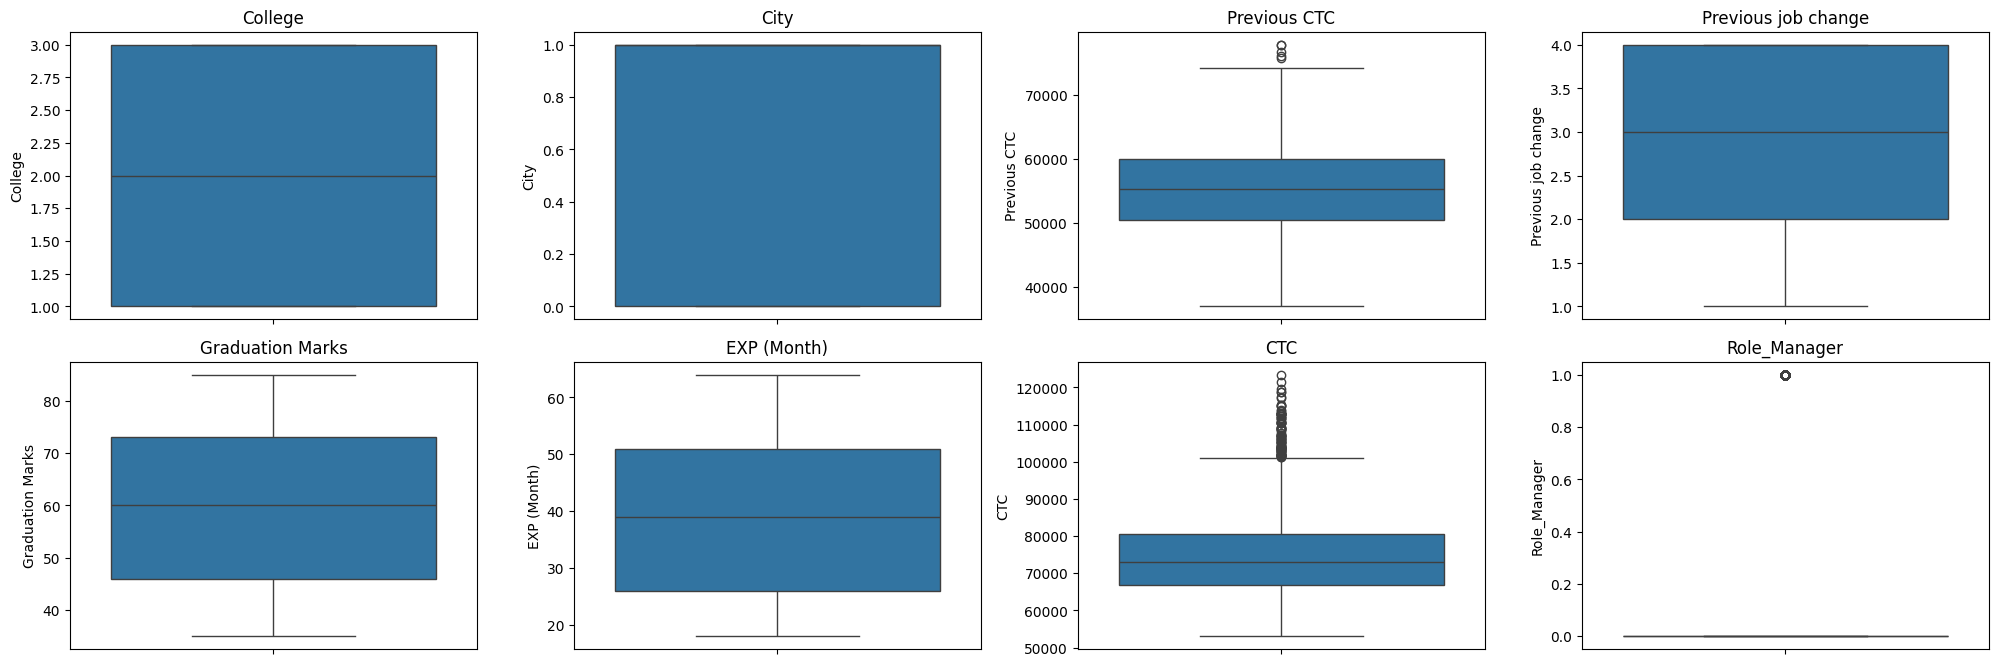

In [13]:
# Plotting boxplots to visualize outliers
plt.figure(figsize=(20, 10))

# Plotting boxplots for each feature in the dataset
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


from the outputs from the above we can see only 'Previous CTC' and 'CTC' has outliers. but in case of salary it can be possible some unrelated data.
so , if we treat the outliers then acutal data have some effect. Because one salary can be very higher then others so

so from the output from the above boxplots , we can see that there is no outliers.

### Correlation Matrix

In [14]:
df.corr()


,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.257998,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005449,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301117,-0.026751
CTC,-0.029592,-0.020365,0.257998,0.011370,-0.005449,0.301117,1.000000,0.621310
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621310,1.000000


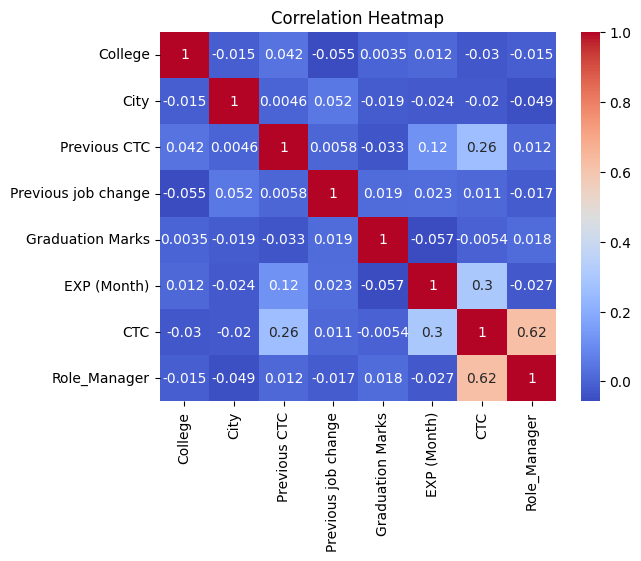

In [15]:
# Calculate the correlation matrix
corr = df.corr()

# Generate a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Train-Test Split

In [16]:
# Split the dataset into features (x_multi) and the target variable (y_multi).
x = df.loc[:, df.columns != 'CTC']
y = df['CTC']

In [17]:
# Split the data into training and testing sets with 80% of train size and 20% test size respectively.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print("shape of the actual data : ",df.shape)
print("shape of x_train, x_test, y_train and y_test are respectively :  ",x_train.shape, x_test.shape, y_train.shape, y_test.shape)

shape of the actual data :  (1589, 8)
shape of x_train, x_test, y_train and y_test are respectively :   (1271, 7) (318, 7) (1271,) (318,)


# Liniear Regression

### Multiple Linear Regression Model by using 'statsmodel.api'

In [18]:
import statsmodels.api as sn
x_cons = sn.add_constant(x)
sma_mlm = sn.OLS(y,x_cons).fit()
sma_mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          4.71e-257
Time:                        20:29:25   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.663     17.522      0.000    3.41e+04    4.27e+04
College              -481.5171    258.382     -1.864      0.063    -988.324      25.290
City                  380.8471    433.456      0.879      0.380    -469.362    1231.056
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5629    192.887      0.656      0.512    -251.779     504.905
Graduation Marks        6.2366     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3459     15.460     16.904      0.000     231.021     291.671
Role_Manager         1.949e+04    534.695     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.727   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.300
Skew:                           0.408   Prob(JB):                     9.81e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multiple Linear Regression Model by using 'statsmodelsklearn.linear_model'

In [19]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
skl_mlm = LinearRegression()
skl_mlm.fit(x,y)
print(skl_mlm.intercept_,skl_mlm.coef_)

38420.72314522228 [-4.81517095e+02  3.80847147e+02  4.10087094e-01  1.26562908e+02
  6.23658369e+00  2.61345898e+02  1.94874110e+04]


In [20]:
# Predicting values for the training and test datasets.
y_train_skl_mlm_pred = skl_mlm.predict(x_train)
y_test_skl_mlm_pred = skl_mlm.predict(x_test)

# Calculating the R-squared (coefficient of determination) scores for the train and test datasets 'Linear Regression'.
r2_y_train_skl_mlm = r2_score(y_train, y_train_skl_mlm_pred)
r2_y_test_skl_mlm = r2_score(y_test, y_test_skl_mlm_pred)

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_y_train_skl_mlm = mean_squared_error(y_train, y_train_skl_mlm_pred)
mse_y_test_skl_mlm = mean_squared_error(y_test, y_test_skl_mlm_pred)

#result
print("Linear Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_y_train_skl_mlm, r2_y_test_skl_mlm))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_y_train_skl_mlm, mse_y_test_skl_mlm))

Linear Regression - R2_Score and MSE :
R-squared (R^2) - Train: 0.512371759593208, Test: 0.603390790430252
Mean Squared Error (MSE) - Train: 73307266.89435177, Test: 75452996.99832487



# Standardize the data for Ridge and Lasso

In [21]:
# Standardize the data using StandardScaler from scikit-learn

#from sklearn import preprocessing
# Transforming to scaler on the test and train data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

## Ridge Regression

In [22]:
# Ridge model implementation
rr = Ridge( alpha= 0.5)
rr.fit(x_train_scaler, y_train)

# Calculating the R-squared (coefficient of determination) scores for the train and test datasets for 'Ridge Regression' 
r2_y_train_rr_mlm = r2_score(y_train, rr.predict(x_train_scaler))
r2_y_test_rr_mlm = r2_score(y_test, rr.predict(x_test_scaler))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_y_train_rr_mlm = mean_squared_error(y_train, rr.predict(x_train_scaler))
mse_y_test_rr_mlm = mean_squared_error(y_test, rr.predict(x_test_scaler))

print("Ridge Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_y_train_rr_mlm, r2_y_test_rr_mlm))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_y_train_rr_mlm, mse_y_test_rr_mlm))

Ridge Regression - R2_Score and MSE :
R-squared (R^2) - Train: 0.5137733271264674, Test: 0.5932831602575619
Mean Squared Error (MSE) - Train: 73096563.17230032, Test: 77375925.08642326



#### Ridge model implementation with 'validation_curve'


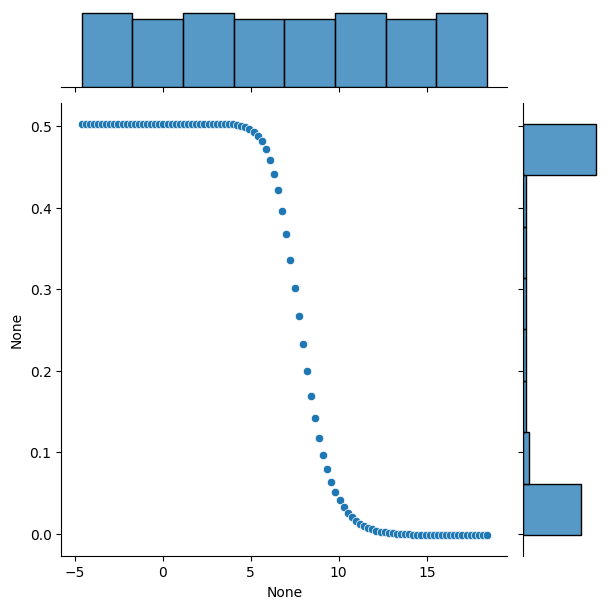

In [23]:

# Define a range of alpha values for Ridge regression
param_range = np.logspace(-2, 8, 100)

# Perform cross-validated validation curve to find the best alpha for Ridge regression
train_scores, valid_scores = validation_curve(Ridge(), x_train_scaler, y_train,
                                              param_name="alpha", param_range=param_range, 
                                              cv=5, scoring='r2')

# Calculate Mean R-squared for training and validation sets
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(valid_scores, axis = 1)

# Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range), y=test_mean)

In [24]:
# Find the alpha value with the highest validation R-squared
print(np.where(test_mean==max(test_mean)))

print(param_range[np.where(test_mean==max(test_mean))])


(array([28]),)
[6.73415066]


In [25]:
# Train a Ridge regression model with the best alpha
rr_best = Ridge(alpha = param_range[26])
rr_best.fit(x_train_scaler, y_train)



Ridge(alpha=np.float64(4.229242874389499))

In [26]:
# Calculating the R-squared (coefficient of determination) scores for the train and test datasets for 'Ridge Regression' 
r2_y_train_rr_mlm = r2_score(y_train, rr_best.predict(x_train_scaler))
r2_y_test_rr_mlm = r2_score(y_test, rr_best.predict(x_test_scaler))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_y_train_rr_mlm = mean_squared_error(y_train, rr_best.predict(x_train_scaler))
mse_y_test_rr_mlm = mean_squared_error(y_test, rr_best.predict(x_test_scaler))

print("Ridge Regression with validation_curve - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_y_train_rr_mlm, r2_y_test_rr_mlm))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_y_train_rr_mlm, mse_y_test_rr_mlm))

Ridge Regression with validation_curve - R2_Score and MSE :
R-squared (R^2) - Train: 0.5137678926246472, Test: 0.5927710170259597
Mean Squared Error (MSE) - Train: 73097380.16451356, Test: 77473357.87614267



## Lasso regression

#### Ridge model implementation with 'validation_curve'


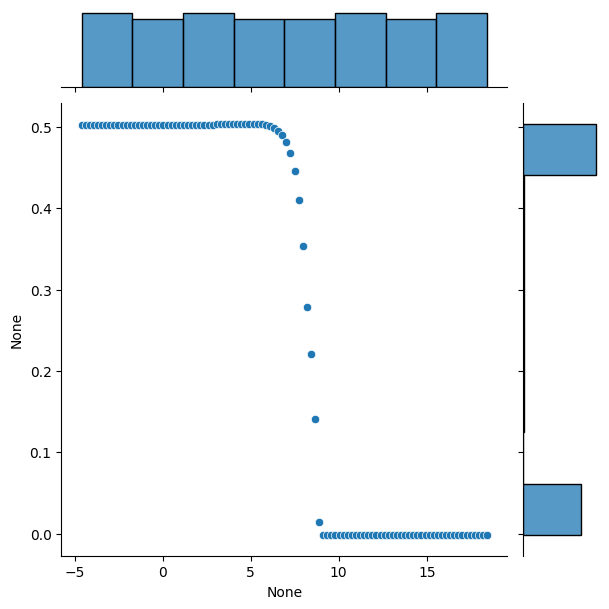

In [27]:
# Define a range of alpha values for Ridge regression
param_range = np.logspace(-2, 8, 100)

# Perform cross-validated validation curve to find the best alpha for Ridge regression
train_scores, valid_scores = validation_curve(Lasso(), x_train_scaler, y_train,
                                              param_name="alpha", param_range=param_range, 
                                              cv=5, scoring='r2')

# Calculate Mean R-squared for training and validation sets
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(valid_scores, axis = 1)

# Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range), y=test_mean)

In [28]:
# Find the alpha value with the highest validation R-squared
print(np.where(test_mean==max(test_mean)))

print(param_range[np.where(test_mean==max(test_mean))])

(array([41]),)
[138.48863714]


In [29]:
# Train a Ridge regression model with the best alpha
lr_best = Lasso(alpha = param_range[41])
lr_best.fit(x_train_scaler, y_train)


Lasso(alpha=np.float64(138.48863713938718))

In [30]:
# Calculating the R-squared (coefficient of determination) scores for the train and test datasets for 'Ridge Regression' 
r2_y_train_lr_mlm = r2_score(y_train, lr_best.predict(x_train_scaler))
r2_y_test_lr_mlm = r2_score(y_test, lr_best.predict(x_test_scaler))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_y_train_lr_mlm = mean_squared_error(y_train, lr_best.predict(x_train_scaler))
mse_y_test_lr_mlm = mean_squared_error(y_test, lr_best.predict(x_test_scaler))

print("Lasso Regression with validation_curve - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_y_train_lr_mlm, r2_y_test_lr_mlm))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_y_train_lr_mlm, mse_y_test_lr_mlm))

Lasso Regression with validation_curve - R2_Score and MSE :
R-squared (R^2) - Train: 0.5131168881205783, Test: 0.5892205589231736
Mean Squared Error (MSE) - Train: 73195248.4932416, Test: 78148815.47548288



# Decision Tree

#### 1. Decision Tree Regression


In [31]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)
regtree.fit(x_train,y_train)

# Calculating the R-squared (coefficient of determination) scores for the train and test datasets.
r2_regtree_train = r2_score(y_train, regtree.predict(x_train))
r2_regtree_test = r2_score(y_test, regtree.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_regtree_train = mean_squared_error(y_train, regtree.predict(x_train))
mse_regtree_test = mean_squared_error(y_test, regtree.predict(x_test))

max_depth = regtree.tree_.max_depth
print("Maximum depth of the tree:", max_depth)

print("Decision Tree Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_regtree_train, r2_regtree_test))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_regtree_train, mse_regtree_test))

Maximum depth of the tree: 3
Decision Tree Regression - R2_Score and MSE :
R-squared (R^2) - Train: 0.6062943355764511, Test: 0.5949134132218526
Mean Squared Error (MSE) - Train: 59187478.960689805, Test: 77065777.29092808



In [32]:
dot_data = tree.export_graphviz(regtree, out_file= None, feature_names= x_train.columns, filled= True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

InvocationException: GraphViz's executables not found

#### 2. Decision Tree Regression with GridSearchCV

In [ ]:
# Create a DecisionTreeRegressor as 'regtree_dtgs'
regtree_dtgs = tree.DecisionTreeRegressor()

# Assuming the values for max_depth, min_samples_split and min_samples_leaf
param_grid = {
    # List of maximum depths we are taking
    'max_depth': range(3,24, 3) , 
    # List of  minimum samples split of a node we are taking
    'min_samples_split': [ 4, 5, 6, 7], 

    # List of minimum samples of a leaf node  we are taking
    'min_samples_leaf': [3, 4, 5, 6, 7]  
}

# Create object as  grid_search
grid_search = GridSearchCV(regtree_dtgs, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)


# Print the best hyperparameters 
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator with the best hyperparameters
best_regtree = grid_search.best_estimator_
print("Print Best extimator", best_regtree)

#Calculating the R-squared (coefficient of determination) scores for the train and test datasets.
r2_train_dtgs = r2_score(y_train, best_regtree.predict(x_train))
r2_test_dtgs = r2_score(y_test, best_regtree.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_train_dtgs = mean_squared_error(y_train, best_regtree.predict(x_train))
mse_test_dtgs = mean_squared_error(y_test, best_regtree.predict(x_test))



print("Decision Tree Regression with GridSearchCV - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_dtgs, r2_test_dtgs))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_dtgs, mse_test_dtgs))

# Random Forest

#### 1. RandomForest Regressor 


In [ ]:
# Define the RandomForestRegressor with the best hyperparameters
rf_reg = RandomForestRegressor(n_estimators= 1000, n_jobs= -1)

# Fit x_train and y_train to the training data
rf_reg.fit(x_train, y_train)

#Calculating the R-squared (coefficient of determination) scores for the train and test datasets.
r2_train_rf = r2_score(y_train, rf_reg.predict(x_train))
r2_test_rf = r2_score(y_test, rf_reg.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_train_rf = mean_squared_error(y_train, rf_reg.predict(x_train))
mse_test_rf = mean_squared_error(y_test, rf_reg.predict(x_test))



print("Random Forest Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_rf, r2_test_rf))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_rf, mse_test_rf))

#### 2. RandomForest Regressor with GridSearchCv


In [ ]:
# Create a RandomForestRegressor
regtree_rfgs = RandomForestRegressor()

# Assuming the values for n_estimators, max_depth, min_samples_split and min_samples_leaf
param_grid = {
    # Number of trees
    'n_estimators': [100, 200, 300],  

    # Maximum depth of each tree
    'max_depth': [5, 10, 20], 

    # Minimum samples required to split a node
    'min_samples_split': [2, 5, 10]  
}

# Create object as  rid_search 
grid_search = GridSearchCV(regtree_rfgs, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)


# Print the best hyperparameters 
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator with the best hyperparameters
best_regtree = grid_search.best_estimator_
print("Print Best extimator", best_regtree)


#Calculating the R-squared (coefficient of determination) scores for the train and test datasets.
r2_train_rfgs = r2_score(y_train, best_regtree.predict(x_train))
r2_test_rfgs = r2_score(y_test, best_regtree.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_train_rfgs = mean_squared_error(y_train, best_regtree.predict(x_train))
mse_test_rfgs = mean_squared_error(y_test, best_regtree.predict(x_test))



print("Random Forest Regression with GridSearchCV - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_rfgs, r2_test_rfgs))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_rfgs, mse_test_rfgs))

# Bagging 

#### 1. Bagging Regressor

In [ ]:
regtree = tree.DecisionTreeRegressor()

# Define the RandomForestRegressor with the best hyperparameters
bag_reg = BaggingRegressor(estimator = regtree, n_estimators= 1000,
                           bootstrap= True, n_jobs= -1,
                           random_state = 42)

# Fit x_train and y_train to the training data
bag_reg.fit(x_train, y_train)

#Calculating the R-squared (coefficient of determination) scores for the train and test datasets.
r2_train_begreg = r2_score(y_train, bag_reg.predict(x_train))
r2_test_begreg = r2_score(y_test, bag_reg.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_train_begreg = mean_squared_error(y_train, bag_reg.predict(x_train))
mse_test_begreg = mean_squared_error(y_test, bag_reg.predict(x_test))



print("Bagging Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_begreg, r2_test_begreg))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_begreg, mse_test_begreg))

#### 2. Bagging Regressor with GridSearchCv

In [ ]:
regtree = tree.DecisionTreeRegressor()
bag_reg = BaggingRegressor(regtree)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150, 200] 
}

# Create object as  grid_search 
grid_search = GridSearchCV(bag_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters 
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator with the best hyperparameters
best_regtree = grid_search.best_estimator_
print("Print Best extimator", best_regtree)

#Calculating the R-squared (coefficient of determination) scores for the train and test datasets.
r2_train_bgs = r2_score(y_train, grid_search.predict(x_train))
r2_test_bgs = r2_score(y_test, grid_search.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_train_bgs = mean_squared_error(y_train, grid_search.predict(x_train))
mse_test_bgs = mean_squared_error(y_test, grid_search.predict(x_test))



print("Bagging Regression with GridSearchCV - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_bgs, r2_test_bgs))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_bgs, mse_test_bgs))

# Gradient Boosting

#### 1. Gradient Boosting Regressor

In [ ]:
gbc_reg = GradientBoostingRegressor()

# Fit x_train and y_train to the training data
gbc_reg.fit(x_train, y_train)

#Calculating the R-squared (coefficient of determination) scores for the train and test datasets.
r2_train_gbr = r2_score(y_train, gbc_reg.predict(x_train))
r2_test_gbr = r2_score(y_test, gbc_reg.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_train_gbr = mean_squared_error(y_train, gbc_reg.predict(x_train))
mse_test_gbr = mean_squared_error(y_test, gbc_reg.predict(x_test))



print("Gradient Boosting Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_gbr, r2_test_gbr))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_gbr, mse_test_gbr))

#### 2. Gradient Boosting Regressor with GridSearchCv

In [ ]:
gre_reg= GradientBoostingRegressor()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create object as  grid_search 
grid_search = GridSearchCV(gre_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters 
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator with the best hyperparameters
best_regtree = grid_search.best_estimator_
print("Print Best extimator", best_regtree)

#Calculating the R-squared (coefficient of determination) scores for the train and test datasets.
r2_train_gbgs = r2_score(y_train, grid_search.predict(x_train))
r2_test_gbgs = r2_score(y_test, grid_search.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_train_gbgs = mean_squared_error(y_train, grid_search.predict(x_train))
mse_test_gbgs = mean_squared_error(y_test, grid_search.predict(x_test))



print("Gradient Boosting Regression with GridSearchCV - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_gbgs, r2_test_gbgs))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_gbgs, mse_test_gbgs))

# AdaBoost

#### 1. AdaBoost Regression

In [ ]:
# Define the RandomForestRegressor with the best hyperparameters
ada_reg = AdaBoostRegressor(learning_rate= 0.02, n_estimators= 5000)

# Fit x_train and y_train to the training data
ada_reg.fit(x_train, y_train)

#Calculating the R-squared (coefficient of determination) scores for the train and test datasets.
r2_train_adareg = r2_score(y_train, ada_reg.predict(x_train))
r2_test_adareg = r2_score(y_test, ada_reg.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_train_adareg = mean_squared_error(y_train, ada_reg.predict(x_train))
mse_test_adareg = mean_squared_error(y_test, ada_reg.predict(x_test))



print("AdaBoost Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_adareg, r2_test_adareg))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_adareg, mse_test_adareg))

#### 2. AdaBoost Regression with GridSearchCv

In [ ]:
regtree = tree.DecisionTreeRegressor()
adb_reg= AdaBoostRegressor(regtree)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05]
}

# Create object as  grid_search 
grid_search = GridSearchCV(adb_reg, param_grid, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters 
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator with the best hyperparameters
best_regtree = grid_search.best_estimator_
print("Print Best extimator", best_regtree)

#Calculating the R-squared (coefficient of determination) scores for the train and test datasets.
r2_train_adargs = r2_score(y_train, grid_search.predict(x_train))
r2_test_adargs = r2_score(y_test, grid_search.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_train_adargs = mean_squared_error(y_train, grid_search.predict(x_train))
mse_test_adargs = mean_squared_error(y_test, grid_search.predict(x_test))



print("AdaBoost Regression with GridSearchCV - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_adargs, r2_test_adargs))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_adargs, mse_test_adargs ))

# xgboost 

#### 1. xgboost Regression

In [ ]:
# Define the RandomForestRegressor with the best hyperparameters
xgb_reg = xgb.XGBRegressor(max_depth = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)

# Fit x_train and y_train to the training data
xgb_reg.fit(x_train, y_train)

#Calculating the R-squared (coefficient of determination) scores for the train and test datasets.
r2_train_xgbreg = r2_score(y_train, xgb_reg.predict(x_train))
r2_test_xgbreg = r2_score(y_test, xgb_reg.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_train_xgbreg = mean_squared_error(y_train, xgb_reg.predict(x_train))
mse_test_xgbreg = mean_squared_error(y_test, xgb_reg.predict(x_test))



print("xgboost Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_xgbreg, r2_test_xgbreg))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_xgbreg, mse_test_xgbreg))

#### 2. xgboost Regression with GridSearchCv

In [ ]:
xgb_reg = xgb.XGBRegressor(n_estimators = 250, learning_rate = 0.1)

# Define the hyperparameters and their possible values
param_test = {
    'max_depth' : range(3, 10, 2),
    'gamma' : [0.1, 0.2, 0.3],
    'subsample' : [0.8, 0.9],
    'colsample_bytree' : [0.8, 0.9],
    'reg_alpha' : [1e-2, 0.1, 1]
}

# Create object as  grid_search 
grid_search =  GridSearchCV(xgb_reg, param_test, n_jobs= -1, cv= 5, scoring= 'accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters 
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best estimator with the best hyperparameters
best_regtree = grid_search.best_estimator_
print("Print Best extimator", best_regtree)

#Calculating the R-squared (coefficient of determination) scores for the train and test datasets.
r2_train_gbr = r2_score(y_train, grid_search.predict(x_train))
r2_test_gbr = r2_score(y_test, grid_search.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the train and test datasets.
mse_train_gbr = mean_squared_error(y_train, grid_search.predict(x_train))
mse_test_gbr = mean_squared_error(y_test, grid_search.predict(x_test))



print("xgboost Regression with GridSearchCv - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_gbr, r2_test_gbr))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_gbr, mse_test_gbr))

# Compare the performance of the above all models 

In [ ]:
print("Linear Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_y_train_skl_mlm, r2_y_test_skl_mlm))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_y_train_skl_mlm, mse_y_test_skl_mlm))
print("\n")

print("Ridge Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_y_train_rr_mlm, r2_y_test_rr_mlm))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_y_train_rr_mlm, mse_y_test_rr_mlm))
print("\n")

print("Ridge Regression with validation_curve - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_y_train_rr_mlm, r2_y_test_rr_mlm))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_y_train_rr_mlm, mse_y_test_rr_mlm))
print("\n")

print("Lasso Regression with validation_curve - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_y_train_lr_mlm, r2_y_test_lr_mlm))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_y_train_lr_mlm, mse_y_test_lr_mlm))
print("\n")

print("Decision Tree Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_regtree_train, r2_regtree_test))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_regtree_train, mse_regtree_test))
print("\n")

print("Decision Tree Regression with GridSearchCV - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_dtgs, r2_test_dtgs))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_dtgs, mse_test_dtgs))
print("\n")

print("Random Forest Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_rf, r2_test_rf))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_rf, mse_test_rf))
print("\n")

print("Random Forest Regression with GridSearchCV - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_rfgs, r2_test_rfgs))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_rfgs, mse_test_rfgs))
print("\n")

print("Bagging Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_begreg, r2_test_begreg))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_begreg, mse_test_begreg))
print("\n")

print("Bagging Regression with GridSearchCV - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_bgs, r2_test_bgs))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_bgs, mse_test_bgs))
print("\n")

print("Gradient Boosting Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_gbr, r2_test_gbr))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_gbr, mse_test_gbr))
print("\n")

print("Gradient Boosting Regression with GridSearchCV - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_gbgs, r2_test_gbgs))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_gbgs, mse_test_gbgs))
print("\n")

print("AdaBoost Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_adareg, r2_test_adareg))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_adareg, mse_test_adareg))
print("\n")

print("AdaBoost Regression with GridSearchCV - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_adargs, r2_test_adargs))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_adargs, mse_test_adargs ))
print("\n")

print("xgboost Regression - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_xgbreg, r2_test_xgbreg))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_xgbreg, mse_test_xgbreg))
print("\n")

print("xgboost Regression with GridSearchCv - R2_Score and MSE :")
print("R-squared (R^2) - Train: {}, Test: {}".format(r2_train_gbr, r2_test_gbr))
print("Mean Squared Error (MSE) - Train: {}, Test: {}\n".format(mse_train_gbr, mse_test_gbr))

## 1. Your views about the problem statement?

##### Answer : 
TechWorks Consulting can use historical data about past employees, such as their qualifications, experience, performance, and salary, here salary/CTC is continuous value. The whats  regression model that can be used to predict the salary of new employees based on their qualifications, experience, and other relevant factors. As a Data Scientist, My point of view on this problem is , Because we are warking with historical data and salary/CTC use as a 'Dependent variable' for train the data , we can go with all the possible models like -  Multi Linear Regression, Ridge , Lasso , Decision Tree, Random Forest, Bagging, Gradient Boosting, AdaBoost, xgboost Regression . And by this we can get our best model withit this model.

## 2. What will be your approach to solving this task?

##### Answer :  
    1. Data Preprocessing:
        * First I import all the essential library
        * Then, I load all the datasets named 'ML case Study', 'Colleges' and 'cities' in variable  df, colleges and city respectively in jupyer
            notebook by using Pandas dataframe.

        * Then, As per problem instruction, the 'Collages' dataset has 'Tier1', 'Tier2' and 'Tier3' columns, and our df/'ML case Study' has column named 'college' . So, we compare value of df['college'] with 'Collages' dataset's 'Tier1', 'Tier2' and 'Tier3' columns data, If 'Tier1' column value in df['college'] then we replce the value of df['college'] machtched value with 1, then 'Tier2' column value in df['college'] then we replce the value of df['college'] machtched value with 2 and so on.

        * Then, As per problem instruction, the 'cities' dataset has 'non-metro cities' and 'Metrio City' columns, and our df/'ML case Study' has column named 'City' . So, we compare value of df['college'] with 'Cities' dataset's 'non-metro cities' and 'Metrio City' columns columns data, If 'non-metro cities' column value in df['City'] then we replce the value of df['City'] machtched value with 0, then 'Metrio City' column value in df['City'] then we replce the value of df['City'] machtched value with 1.

        * Then, In-depth Exploratory Data Analysis (EDA) to understand the data distribution.
        * Then, Checking the null values are available or not for fixing purpose.
        * Then, Creating Dummy_veriable for 'Role' to convert "categorical" data into a set of binary (0/1) indicator variables.
        * Then, Ceckiing any outliers in the data or not by using 'Boxplot'.
        * Then, I used correlation to check the replationship among all the variables.

    2. Model Selection:
        * First Standardisation of data for modes.
        * i used allthe possible regression model for predicting salary. Consider regression models like ulti Linear Regression, Ridge , Lasso , 
          Decision Tree etc..

    3. Model Training and Evaluation:
        * Strategic partitioning of data into test and train datasets  (train : 80% / test : 20 %).
        * Train the particular model on the training dataset.
        * Evaluate the model's performance using  like R-Squared and Mean Squared Error(MSE).
        * Select the model with the best performance.

    4. Model Optimization:
        * Implementation of validation curves for Ridge and Lasso Regression to optimize alpha values.
        * For Decision Tree Regression, Random Forest, XGB Regressor, Bagging Regressor use GridSearchCV.

    5. Conclusion:
        * After performing the all model, the best model according to R2 score and Mean Squared Error (MSE). Model 
          which have 'High R2 score' and 'Less MSE' is the perfect one.
'''   

## 3. What were the available ML model options you had to perform this task?

##### Answer:
    1. Multi Linear Regression 
    2. Ridge               and     Ridge Regression with validation_curve 
    3. Lasso with validation_curve
    4. Decision Tree       and     with GridSearchCV 
    5. Random Forest       and     Random Forest with GridSearchCV 
    6. Bagging             and     Bagging with GridSearchCV 
    7. Gradient Boosting   and     Gradient Boosting with GridSearchCV 
    8. AdaBoost            and     AdaBoost with GridSearchCV 
    9. xgboost             and     xgboost with GridSearchCV 

## 4. Which model’s performance is best and what could be the possible reason for that?

##### Answer:
    Best Performing Model: Random Forest Regressor with GridSearchCV because, Random Forest with GridSearchCV have high R-squared on both train and test data  and also very close not over/under fiting. here we cant choose the mode based on MSE becase MSC contain salary that's why the score of MSE is very high. but is is good among aothers models.

    also i provide all the output for all the above models for better understanding 
    results list :
       1.  Linear Regression - R2_Score and MSE :
            R-squared (R^2) - Train: 0.512371759593208, Test: 0.603390790430252
            Mean Squared Error (MSE) - Train: 73307266.89435177, Test: 75452996.99832487
            
            
            
       2.   Ridge Regression - R2_Score and MSE :
            R-squared (R^2) - Train: 0.5137678926246472, Test: 0.5927710170259597
            Mean Squared Error (MSE) - Train: 73097380.16451356, Test: 77473357.87614267
            
            
            
        3.  Ridge Regression with validation_curve - R2_Score and MSE :
            R-squared (R^2) - Train: 0.5137678926246472, Test: 0.5927710170259597
            Mean Squared Error (MSE) - Train: 73097380.16451356, Test: 77473357.87614267
            
            
            
        4.  Lasso Regression with validation_curve - R2_Score and MSE :
            R-squared (R^2) - Train: 0.5131168881205783, Test: 0.5892205589231736
            Mean Squared Error (MSE) - Train: 73195248.4932416, Test: 78148815.47548288
            
            
            
        5.  Decision Tree Regression - R2_Score and MSE :
            R-squared (R^2) - Train: 0.6062943355764511, Test: 0.5949134132218526
            Mean Squared Error (MSE) - Train: 59187478.960689805, Test: 77065777.29092808
            
            
            
        6.  Decision Tree Regression with GridSearchCV - R2_Score and MSE :
            R-squared (R^2) - Train: 0.6062943355764511, Test: 0.5949134132218526
            Mean Squared Error (MSE) - Train: 59187478.960689805, Test: 77065777.29092808
            
            
            
        7.  Random Forest Regression - R2_Score and MSE :
            R-squared (R^2) - Train: 0.9502918357007379, Test: 0.6395954308141006
            Mean Squared Error (MSE) - Train: 7472843.787870854, Test: 68565238.07519892
            
            
            
        8.  Random Forest Regression with GridSearchCV - R2_Score and MSE :
            R-squared (R^2) - Train: 0.6866436029894669, Test: 0.6163588008983729
            Mean Squared Error (MSE) - Train: 47108225.33481726, Test: 72985895.29892951
            
            
            
        9.  Bagging Regression - R2_Score and MSE :
            R-squared (R^2) - Train: 0.950146619725284, Test: 0.63753719503593
            Mean Squared Error (MSE) - Train: 7494674.734866556, Test: 68956807.54520853
            
            
            
        10. Bagging Regression with GridSearchCV - R2_Score and MSE :
            R-squared (R^2) - Train: 0.9495914303076938, Test: 0.6333375865841424
            Mean Squared Error (MSE) - Train: 7578138.766355486, Test: 69755762.88023621
            
            
            
        11. Gradient Boosting Regression with GridSearchCV - R2_Score and MSE :
            R-squared (R^2) - Train: 0.7807811498641968, Test: 0.6341514587402344
            Mean Squared Error (MSE) - Train: 32956119.83884312, Test: 69600917.12341914
            
            
            
        12. Gradient Boosting Regression with GridSearchCV - R2_Score and MSE :
            R-squared (R^2) - Train: 0.38732870574360956, Test: 0.3737820856249422
            Mean Squared Error (MSE) - Train: 92105531.15031514, Test: 119134950.15634294
            
            
            
        13. AdaBoost Regression - R2_Score and MSE :
            R-squared (R^2) - Train: 0.6179873230951889, Test: 0.6062425051429197
            Mean Squared Error (MSE) - Train: 57429621.46639587, Test: 74910471.97252324
            
            
            
        14. AdaBoost Regression with GridSearchCV - R2_Score and MSE :
            R-squared (R^2) - Train: 0.9999993254950086, Test: 0.6235981862052382
            Mean Squared Error (MSE) - Train: 101.4012588512982, Test: 71608637.01886792
            
            
            
        15. xgboost Regression - R2_Score and MSE :
            R-squared (R^2) - Train: 1.0, Test: 0.6153922080993652
            Mean Squared Error (MSE) - Train: 0.001296792979506786, Test: 73169787.86542189
            
            
            
        16. xgboost Regression with GridSearchCv - R2_Score and MSE :
            R-squared (R^2) - Train: 0.7807811498641968, Test: 0.6341514587402344
            Mean Squared Error (MSE) - Train: 32956119.83884312, Test: 69600917.12341914


## 5. What steps can you take to improve this selected model’s performance even further?

##### Answer:
        GridsearchCV  is a class from the sklearn.model_selection modul. By using GridsearchCV for this model we should improve its performance. because with different parameters model we would select best one with high performance(e.g., number of trees, maximum depth, minimum samples per leaf).

        
        parametres :
            1. estimator: The machine learning model (in your case, regtree_rfgs) that you want to tune.
            2. param_grid: The dictionary of hyperparameters and their possible values.
                    i. 'n_estimators': The number of trees in the random forest.
                    11. 'max_depth': The maximum depth of each tree.
                    iii. 'min_samples_split': The minimum number of samples required to split an internal node.
            3. cv: The number of cross-validation folds (here, 5-fold cross-validation).
            4. scoring: The evaluation metric to use (e.g., ‘accuracy’).
            5. n_jobs: The number of CPU cores to use for parallel computation (set to -1 to use all available cores).

# ------------------------------------ Thank You --------------------------------------